In [ ]:
#Analysis of the final 30,000 breach attempts (Azure only allows export of 30,000 values) 

In [ ]:
#import libraries

In [91]:
import pandas as pd

In [93]:
import seaborn as sns

In [161]:
import matplotlib.pyplot as plt

In [ ]:
#Upload csv file

In [95]:
df = pd.read_csv("Updated_VM_Breach_9_2024.csv")

In [97]:
df.head(10)

,timestamp,label,country,state,sourcehost,username,longitude,latitude,destinationhost,event_count
0,2024-09-25 14:29:25,China - 106.63.4.245,China,Tianjin,106.63.4.245,Administrator,117.19018,39.12560,honeypot-vm,1
1,2024-09-25 14:29:15,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1
2,2024-09-25 14:29:08,United States - 170.103.35.139,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,honeypot-vm,1
3,2024-09-25 14:28:58,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1
4,2024-09-25 14:28:55,United States - 170.103.35.139,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,honeypot-vm,1
5,2024-09-25 14:28:44,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1
6,2024-09-25 14:28:41,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1
7,2024-09-25 14:28:23,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1
8,2024-09-25 14:28:17,United States - 170.103.35.139,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,honeypot-vm,1
9,2024-09-25 14:28:06,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1


In [ ]:
######################################################### Cleaning up the dataset ######################################################################

In [ ]:
# **Splitting the timestamp into two different values, date and time**

In [99]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date

In [101]:
df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [103]:
df.head(20)

,timestamp,label,country,state,sourcehost,username,longitude,latitude,destinationhost,event_count,date,time
0,2024-09-25 14:29:25,China - 106.63.4.245,China,Tianjin,106.63.4.245,Administrator,117.19018,39.12560,honeypot-vm,1,2024-09-25,14:29:25
1,2024-09-25 14:29:15,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1,2024-09-25,14:29:15
2,2024-09-25 14:29:08,United States - 170.103.35.139,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,honeypot-vm,1,2024-09-25,14:29:08
3,2024-09-25 14:28:58,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1,2024-09-25,14:28:58
4,2024-09-25 14:28:55,United States - 170.103.35.139,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,honeypot-vm,1,2024-09-25,14:28:55
5,2024-09-25 14:28:44,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:44
6,2024-09-25 14:28:41,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1,2024-09-25,14:28:41
7,2024-09-25 14:28:23,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1,2024-09-25,14:28:23
8,2024-09-25 14:28:17,United States - 170.103.35.139,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,honeypot-vm,1,2024-09-25,14:28:17
9,2024-09-25 14:28:06,South Korea - 222.119.70.76,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,honeypot-vm,1,2024-09-25,14:28:06


In [ ]:
# **Investigate null values**

In [107]:
df.isnull().sum()

timestamp             0
label                 0
country               0
state              2040
sourcehost            0
username             59
longitude             0
latitude              0
destinationhost       0
event_count           0
date                  0
time                  0
dtype: int64

In [109]:
# There are 2040 null values within the dataset, residing under the states column

In [111]:
df[df['state'].isnull()]

,timestamp,label,country,state,sourcehost,username,longitude,latitude,destinationhost,event_count,date,time
5,2024-09-25 14:28:44,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:44
11,2024-09-25 14:28:00,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:00
15,2024-09-25 14:27:15,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMINISTRATOR,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:27:15
20,2024-09-25 14:26:32,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:26:32
25,2024-09-25 14:25:49,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:25:49
...,...,...,...,...,...,...,...,...,...,...,...,...
18010,2024-09-25 15:30:26,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMINISTRATOR,103.85211,1.29041,honeypot-vm,1,2024-09-25,15:30:26
18014,2024-09-25 15:03:41,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,15:03:41
18020,2024-09-25 15:02:58,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,15:02:58
24942,2024-09-25 7:51:44,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,07:51:44


In [ ]:
# Singapore pops up a ton in the search, but we don't fully know if it is the only country with this issue without more investigating

In [31]:
df[df['country'] == 'Singapore']

,timestamp,label,country,state,sourcehost,username,longitude,latitude,destinationhost,event_count,date,time
5,2024-09-25 14:28:44,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:44
11,2024-09-25 14:28:00,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:00
15,2024-09-25 14:27:15,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMINISTRATOR,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:27:15
20,2024-09-25 14:26:32,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:26:32
25,2024-09-25 14:25:49,Singapore - 124.155.197.50,Singapore,NaN,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:25:49
...,...,...,...,...,...,...,...,...,...,...,...,...
28213,2024-09-25 1:45:03,Singapore - 45.76.144.19,Singapore,Central Singapore Community Development Council,45.76.144.19,ADMINUSER,103.69503,1.32123,honeypot-vm,1,2024-09-25,01:45:03
28214,2024-09-25 1:44:37,Singapore - 45.76.144.19,Singapore,Central Singapore Community Development Council,45.76.144.19,ADMINUSER,103.69503,1.32123,honeypot-vm,1,2024-09-25,01:44:37
29096,2024-09-25 5:53:31,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:53:31
29803,2024-09-24 21:38:55,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-24,21:38:55


In [ ]:
# Singapore comes back with 2118 rows, but with a different state value popping up alongside null, lets dig deeper...

In [33]:
df[df['state'] == 'Central Singapore Community Development Council']

,timestamp,label,country,state,sourcehost,username,longitude,latitude,destinationhost,event_count,date,time
19672,2024-09-25 5:53:46,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:53:46
19724,2024-09-25 5:42:13,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:42:13
19726,2024-09-25 5:41:59,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:41:59
19733,2024-09-25 5:39:28,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:39:28
19735,2024-09-25 5:39:09,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:39:09
...,...,...,...,...,...,...,...,...,...,...,...,...
28213,2024-09-25 1:45:03,Singapore - 45.76.144.19,Singapore,Central Singapore Community Development Council,45.76.144.19,ADMINUSER,103.69503,1.32123,honeypot-vm,1,2024-09-25,01:45:03
28214,2024-09-25 1:44:37,Singapore - 45.76.144.19,Singapore,Central Singapore Community Development Council,45.76.144.19,ADMINUSER,103.69503,1.32123,honeypot-vm,1,2024-09-25,01:44:37
29096,2024-09-25 5:53:31,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:53:31
29803,2024-09-24 21:38:55,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-24,21:38:55


In [ ]:
# 2118 - 78 = 2040, Therefore all null state values reside in Singapore 

In [ ]:
# Singapore is a city-state, meaning it does not have states or provinces but rather acts as one unified entity

In [ ]:
# **Lets fill these null values with the value 'Singapore' to prevent future confusion

In [55]:
df['state'].dtype

dtype('O')

In [67]:
df['state'] = df['state'].fillna('Singapore')

In [69]:
df.isnull().sum()

timestamp           0
label               0
country             0
state               0
sourcehost          0
username           59
longitude           0
latitude            0
destinationhost     0
event_count         0
date                0
time                0
dtype: int64

In [73]:
df[df['country'] == 'Singapore']

,timestamp,label,country,state,sourcehost,username,longitude,latitude,destinationhost,event_count,date,time
5,2024-09-25 14:28:44,Singapore - 124.155.197.50,Singapore,Singapore,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:44
11,2024-09-25 14:28:00,Singapore - 124.155.197.50,Singapore,Singapore,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:28:00
15,2024-09-25 14:27:15,Singapore - 124.155.197.50,Singapore,Singapore,124.155.197.50,ADMINISTRATOR,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:27:15
20,2024-09-25 14:26:32,Singapore - 124.155.197.50,Singapore,Singapore,124.155.197.50,USER,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:26:32
25,2024-09-25 14:25:49,Singapore - 124.155.197.50,Singapore,Singapore,124.155.197.50,ADMIN,103.85211,1.29041,honeypot-vm,1,2024-09-25,14:25:49
...,...,...,...,...,...,...,...,...,...,...,...,...
28213,2024-09-25 1:45:03,Singapore - 45.76.144.19,Singapore,Central Singapore Community Development Council,45.76.144.19,ADMINUSER,103.69503,1.32123,honeypot-vm,1,2024-09-25,01:45:03
28214,2024-09-25 1:44:37,Singapore - 45.76.144.19,Singapore,Central Singapore Community Development Council,45.76.144.19,ADMINUSER,103.69503,1.32123,honeypot-vm,1,2024-09-25,01:44:37
29096,2024-09-25 5:53:31,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-25,05:53:31
29803,2024-09-24 21:38:55,Singapore - 139.99.54.173,Singapore,Central Singapore Community Development Council,139.99.54.173,Administrator,103.85211,1.29041,honeypot-vm,1,2024-09-24,21:38:55


In [ ]:
# **Dropping Unessisary Columns**

In [141]:
df.drop(['label','destinationhost'], axis=1)

,timestamp,country,state,sourcehost,username,longitude,latitude,event_count,date,time
0,2024-09-25 14:29:25,China,Tianjin,106.63.4.245,Administrator,117.19018,39.12560,1,2024-09-25,14:29:25
1,2024-09-25 14:29:15,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,1,2024-09-25,14:29:15
2,2024-09-25 14:29:08,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,1,2024-09-25,14:29:08
3,2024-09-25 14:28:58,South Korea,Gyeonggi-do,222.119.70.76,ADMINISTRATOR,127.11492,37.35875,1,2024-09-25,14:28:58
4,2024-09-25 14:28:55,United States,Florida,170.103.35.139,Administrator,-80.19773,25.77481,1,2024-09-25,14:28:55
...,...,...,...,...,...,...,...,...,...,...
29995,2024-09-24 21:33:08,Indonesia,JABODETABEK,119.235.29.70,administrator,106.79802,-6.15513,1,2024-09-24,21:33:08
29996,2024-09-24 21:33:07,Indonesia,JABODETABEK,119.235.29.70,administrator,106.79802,-6.15513,1,2024-09-24,21:33:07
29997,2024-09-24 21:33:06,Indonesia,JABODETABEK,119.235.29.70,administrator,106.79802,-6.15513,1,2024-09-24,21:33:06
29998,2024-09-24 21:33:05,Indonesia,JABODETABEK,119.235.29.70,administrator,106.79802,-6.15513,1,2024-09-24,21:33:05


In [ ]:
# Now we have a very simple dataset with only the columns we need

In [ ]:
######################################################## Questions about the data ######################################################################

In [ ]:
# Q1: Which countries are the most frequent sources of attack attempts?

In [ ]:
# **First we should figure out how many countries we are dealing with

In [117]:
df['country'].unique()

array(['China', 'South Korea', 'United States', 'Singapore', 'Russia',
       'Moldova', 'Indonesia', 'Netherlands', 'Morocco', 'Ukraine',
       'Turkey', 'Germany', 'Egypt', 'India', 'Pakistan',
       'United Arab Emirates', 'Kenya', 'Finland', 'Thailand', 'Syria',
       'Japan', 'Hong Kong', 'Brazil', 'France', 'United Kingdom',
       'Vietnam', 'Canada', 'Chile', 'Belgium', 'Switzerland'],
      dtype=object)

In [ ]:
# **List the countries in decending order

In [121]:
country_sizes = df.groupby('country').size()

In [165]:
country_sizes.sort_values(ascending=False)

country
Russia                  11904
South Korea              3528
United States            3049
India                    2941
Pakistan                 2449
Singapore                2118
Turkey                    846
Moldova                   729
Ukraine                   562
Egypt                     520
Indonesia                 450
Syria                     187
Chile                     171
Thailand                  164
China                     156
Japan                     103
Vietnam                    58
Kenya                      19
Morocco                    12
Germany                    11
Canada                      6
Hong Kong                   5
Netherlands                 3
Brazil                      2
United Kingdom              2
Switzerland                 1
France                      1
Finland                     1
United Arab Emirates        1
Belgium                     1
dtype: int64

In [ ]:
# We can obviously see here that Russia has performed the most attacks, but lets try and do a simple visualization

In [177]:
selected_countries = ['Russia','South Korea','United States','India','Pakistan','Singapore']

In [179]:
Q1_df = df[df['country'].isin(selected_countries)]

C:\Users\jleit\AppData\Local\Temp\ipykernel_26716\3782080763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'country', data=Q1_df, palette = 'Blues_d')


Text(0, 0.5, 'Number of Attacks')

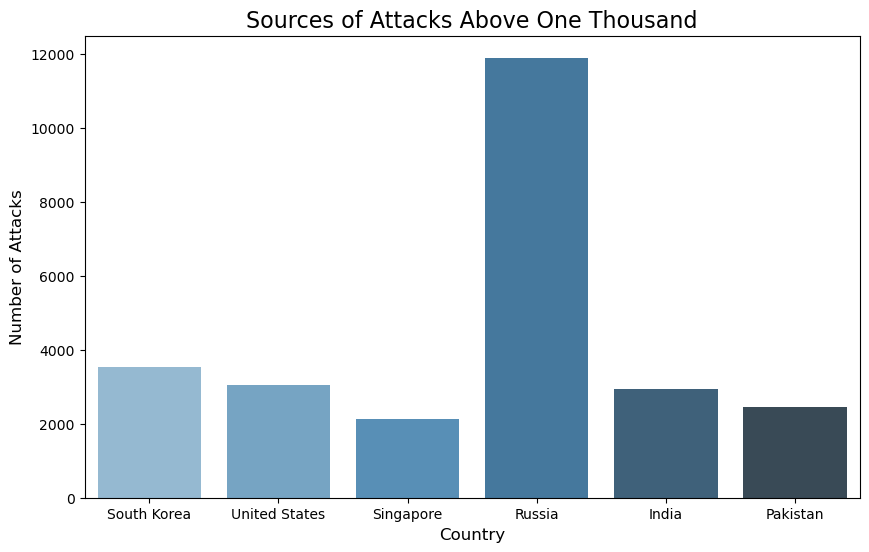

In [185]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'country', data=Q1_df, palette = 'Blues_d')
plt.title('Sources of Attacks Above One Thousand', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)

In [ ]:
# We can better see here how much more Russian attacks occured compared to the other top countries